In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

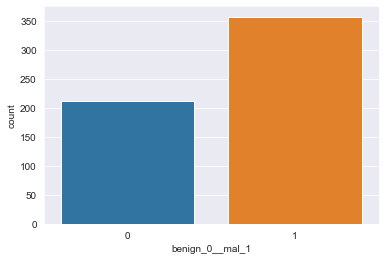

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

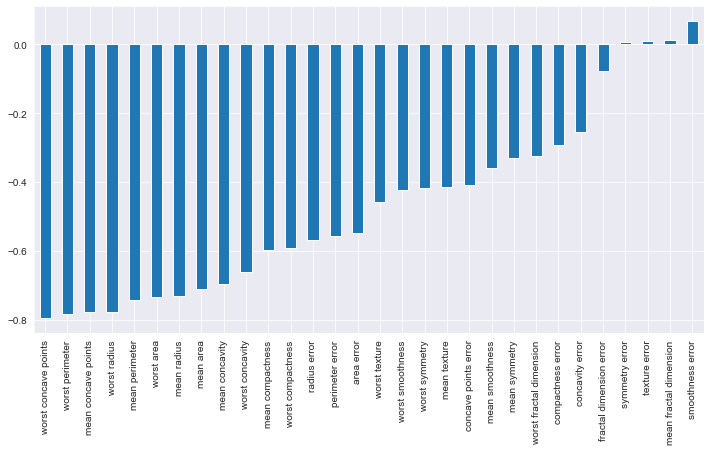

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar',figsize=(12,6)) # [:-1] to drop the last self-corr column

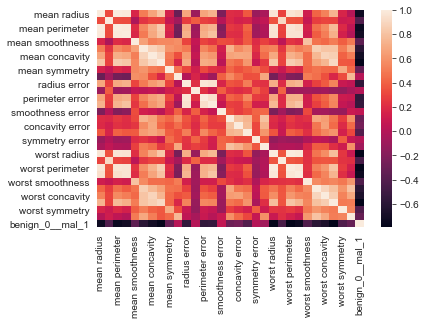

In [14]:
sns.heatmap(df.corr())

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# BINARY classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))
# We intentionally give a large number for epochs to over-fit the model, just to explore overfitting

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6837 - val_loss: 0.6698
Epoch 2/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6587 - val_loss: 0.6469
Epoch 3/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6344 - val_loss: 0.6213
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6068 - val_loss: 0.5899
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5726 - val_loss: 0.5527
Epoch 6/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5334 - val_loss: 0.5099
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4893 - val_loss: 0.4633
Epoch 8/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4439 - val_loss: 0.4118
Epoch 9/600
426/426 [==============================] - 0s 63us/sample - loss: 0.3954 - val_loss: 0.3648
Epoch 10/600
426/42

426/426 [==============================] - 0s 60us/sample - loss: 0.0482 - val_loss: 0.1433
Epoch 156/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0499 - val_loss: 0.1279
Epoch 157/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0476 - val_loss: 0.1238
Epoch 158/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0466 - val_loss: 0.1163
Epoch 159/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0513 - val_loss: 0.1341
Epoch 160/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0479 - val_loss: 0.1171
Epoch 161/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0479 - val_loss: 0.1335
Epoch 162/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0472 - val_loss: 0.1183
Epoch 163/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0457 - val_loss: 0.1233
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 68us/sample - loss: 0.0348 - val_loss: 0.1636
Epoch 310/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0347 - val_loss: 0.1435
Epoch 311/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0380 - val_loss: 0.1578
Epoch 312/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0331 - val_loss: 0.1475
Epoch 313/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0361 - val_loss: 0.1426
Epoch 314/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0326 - val_loss: 0.1675
Epoch 315/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0337 - val_loss: 0.1477
Epoch 316/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0327 - val_loss: 0.1444
Epoch 317/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0338 - val_loss: 0.1809
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0210 - val_loss: 0.1639
Epoch 463/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0205 - val_loss: 0.1749
Epoch 464/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0206 - val_loss: 0.1872
Epoch 465/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0222 - val_loss: 0.1732
Epoch 466/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0225 - val_loss: 0.1598
Epoch 467/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0219 - val_loss: 0.1813
Epoch 468/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0213 - val_loss: 0.1786
Epoch 469/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0218 - val_loss: 0.1828
Epoch 470/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0198 - val_loss: 0.1631
Epoch 471/600
426/426 [==============================] - 0s 

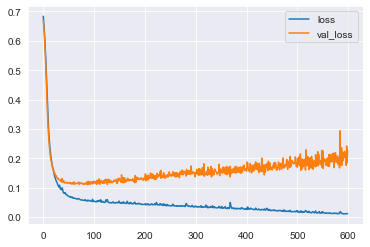

In [30]:
pd.DataFrame(model.history.history).plot() 
# Model is overfitting - training loss decreasing but validation loss is increasing

In [31]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# BINARY classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [34]:
# Stops trainig when a certain critera is met
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We want to minimize the loss, so we choose mode='min' - In case of accuracy, we could use mode='max'
# Patience = how many epochs to wait before stopping the training

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop]) # callbacks are always passed in as a list, even if it has only one element

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 974us/sample - loss: 0.6988 - val_loss: 0.6671
Epoch 2/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6528 - val_loss: 0.6320
Epoch 3/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6176 - val_loss: 0.5950
Epoch 4/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5796 - val_loss: 0.5498
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5316 - val_loss: 0.4958
Epoch 6/600
426/426 [==============================] - 0s 72us/sample - loss: 0.4720 - val_loss: 0.4369
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4148 - val_loss: 0.3817
Epoch 8/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3611 - val_loss: 0.3320
Epoch 9/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3172 - val_loss: 0.2900
Epoch 10/600
426/

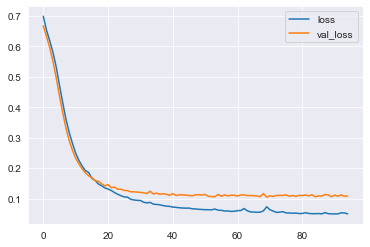

In [36]:
pd.DataFrame(model.history.history).plot() 

In [37]:
from tensorflow.keras.layers import Dropout
# Dropout consists in randomly setting a fraction `rate` of input units to 0 at each update during training time,
# which helps prevent overfitting.

In [42]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))
# rate=probability to randomly turn-off neurons - Float between 0 and 1. Fraction of the input units to drop, usually 02-0.5
# rate=0.5 means 50% of neurons will be turned off randomely during each batch training and won't be updated, to prevent overfitting
    
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
# Stops trainig when a certain critera is met
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We want to minimize the loss, so we choose mode='min' - In case of accuracy, we could use mode='max'
# Patience = how many epochs to wait before stopping the training

In [44]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop]) # callbacks are alwas passed in as a list, even if it has only one element

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6843 - val_loss: 0.6517
Epoch 2/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6790 - val_loss: 0.6459
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6457 - val_loss: 0.6204
Epoch 4/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6241 - val_loss: 0.5859
Epoch 5/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6116 - val_loss: 0.5548
Epoch 6/600
426/426 [==============================] - 0s 72us/sample - loss: 0.5685 - val_loss: 0.5196
Epoch 7/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5508 - val_loss: 0.4849
Epoch 8/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5496 - val_loss: 0.4581
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4853 - val_loss: 0.4219
Epoch 10/600
426/42

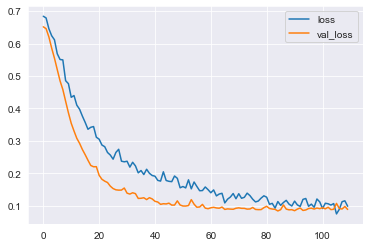

In [45]:
pd.DataFrame(model.history.history).plot() 

In [46]:
model.predict(X_test)

array([[9.87954259e-01],
       [9.91577506e-01],
       [9.93286073e-01],
       [1.90407932e-02],
       [9.99340117e-01],
       [9.99353826e-01],
       [9.99523997e-01],
       [1.39805861e-05],
       [9.95831430e-01],
       [9.97957706e-01],
       [5.35555091e-03],
       [9.95294392e-01],
       [9.61966097e-01],
       [9.99313474e-01],
       [2.26072362e-03],
       [9.99239564e-01],
       [9.86426115e-01],
       [9.98801589e-01],
       [2.70763776e-05],
       [8.61338004e-02],
       [9.59534347e-01],
       [9.97707844e-01],
       [9.85973835e-01],
       [9.99201953e-01],
       [2.05939705e-03],
       [9.45392549e-01],
       [1.06271834e-03],
       [9.99913096e-01],
       [1.39479141e-03],
       [1.70709658e-02],
       [4.46505070e-01],
       [1.02161448e-02],
       [7.16665566e-01],
       [2.12373614e-01],
       [9.99035478e-01],
       [9.99252379e-01],
       [2.25641429e-02],
       [7.02586398e-02],
       [5.02168667e-04],
       [1.57179893e-05],


In [48]:
model.predict_classes(X_test) # Since this is a classification problem, we use predict_classes instead

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions)) # Reports the precision, recal, f1-score ect based on Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [52]:
print(confusion_matrix(y_test, predictions)) # Reports the Confusion Matrix ([[tn, fp], [fn, tp]])

[[54  1]
 [ 1 87]]


Precision or positive predictive value (PPV):  PPV = TP/(TP + FP) = 1 - FDR

Recall, sensitivity, hit rate, or true positive rate (TPR): TPR = TP/P = TP/(TP+FN) = 1 - FNR

Accuracy (ACC) = (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)

F1 score is the harmonic mean of precision and sensitivity: F1 = 2 * (PPV.TPR)/(PPV+TPR)